# Supervised classification with Random Forest

### Importin the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from helpers import undersampling

### Preprocessing

In [2]:
df_unchange = pd.read_csv('data.csv')
df = undersampling(df_unchange)
X = df.iloc[:,1:14].to_numpy()
Y = df.iloc[:,-4:].to_numpy()

Train/test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Feature scaling
$$x = \frac{\overline{x} - x}{\sigma_{x}}$$

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 Dimensionlity reduction: Principal component analysis
 13 -> 10
It speedup learning proces but decrease accuracy

In [5]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

TO DO Cross Validation

### Training

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
print(X_test.shape)

(128892, 10)


### Validation

acc:  0.8190966080129101


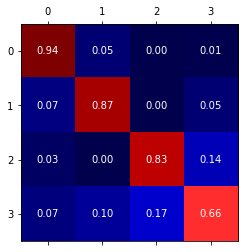

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("acc: ",accuracy_score(y_test, y_pred))
fig, ax = plt.subplots()
cm = cm/(0.25*len(X_test))
ax.matshow(cm, cmap='seismic')
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',color = 'white')
plt.show()

In [9]:
X = df_unchange.iloc[:,1:14].to_numpy()
X = sc.fit_transform(X)
X = pca.transform(X)
Y_present = clf.predict(X)

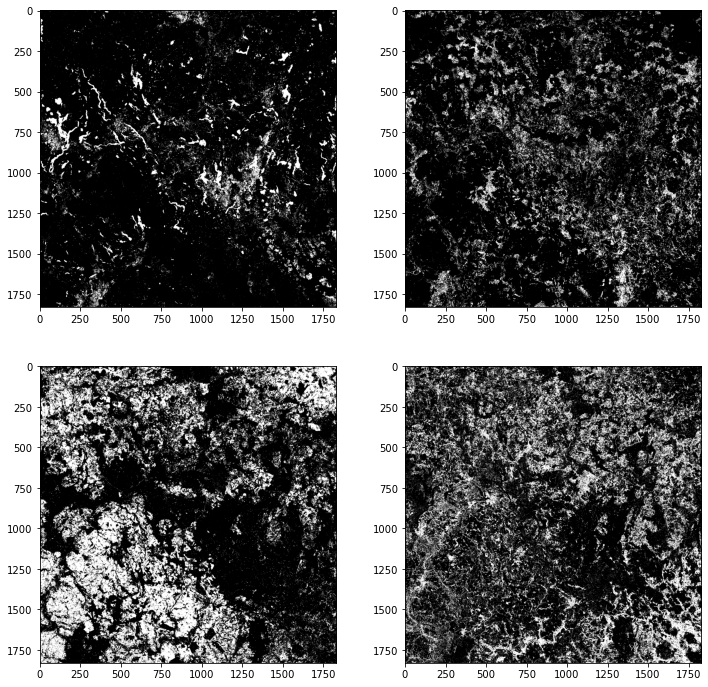

In [10]:
Y_present = Y_present.reshape((1830,1830,4))
fig, axs = plt.subplots(figsize=(12,12), ncols = 2, nrows=2)
axs[0,0].imshow(Y_present[...,0]*255,cmap='gray', vmin=0, vmax=255)
axs[0,1].imshow(Y_present[...,1]*255,cmap='gray', vmin=0, vmax=255)
axs[1,0].imshow(Y_present[...,2]*255,cmap='gray', vmin=0, vmax=255)
axs[1,1].imshow(Y_present[...,3]*255,cmap='gray', vmin=0, vmax=255)

In [11]:
Y_present = Y_present.reshape((1830*1830,4))
np.max(Y_present,axis=0)

array([1., 1., 1., 1.])